In [34]:
import heapq, os


class Node:
    def __init__(self, val, freq):
        self.val = val
        self.freq = freq
        self.left = None
        self.right = None
        
    # function overloading to compareon the basis of frequencies
    def __lt__(self, other):
        return self.freq < other.freq
    
    def __eq__(self, other):
        return self.freq == other.freq

class HuffmanCode:
    
    def __init__(self, path):
        self.path = path
        self.__heap = []
        self.__encoded = {}
        self.__decoded = {}
        
    def __frequency_from_text(self, text): # __ to create a private function
        freq_dictionary = {}
        for c in text:
            if c not in freq_dictionary:
                freq_dictionary[c] = 0
            freq_dictionary[c] += 1
        return freq_dictionary
    
    def __build_heap(self, freq_dict):
        for key in freq_dict:
            freq = freq_dict[key]
            node = Node(key, freq)
            heapq.heappush(self.__heap, node)
            
    def __build_binary_tree(self):
        while len(self.__heap) > 1:
            node1 = heapq.heappop(self.__heap)
            node2 = heapq.heappop(self.__heap)

            freqSum = node1.freq + node2.freq
            newNode = Node(None, freqSum)
            newNode.left = node1
            newNode.right = node2
            heapq.heappush(self.__heap, newNode)
        return
    
    
    def __encode_text(self, root, curr_code):
        if root is None: 
            return
        if root.val is not None:
            self.__encoded[root.val] = curr_code
            self.__decoded[curr_code] = root.val
            return
            
        self.__encode_text(root.left, curr_code+'0')
        self.__encode_text(root.right, curr_code+'1')
        
    def __get_encoded_text(self, text):
        encoded_text = ''
        for char in text:
            encoded_text += self.__encoded[char]
            
        return encoded_text
            
    def __add_padding(self, encoded_text):
        padding_value = (8 - len(encoded_text)) % 8
        for i in range(padding_value):
            encoded_text += '0'
            
        padded_info = "{:08b}".format(padding_value)
        padded_text = padded_info + encoded_text
        return padded_text
    
    def __get_byte_array(self, padded_text):
        array = []
        for i in range(0, len(padded_text), 8):
            byte = padded_text[i:i+8]
            array.append(int(byte, 2))
        return array
        
    def compress(self):
        
        print("File compression in process....")
        
        # to access the file and extract text from that file
        fileName, fileExtension = os.path.splitext(self.path)
        print("file: ", os.path.splitext(self.path))
        output_path = fileName + '.bin'
        with open(self.path, 'r+') as file , open(output_path, 'wb') as output:
            text = file.read()
            text = text.rstrip()
            
            print(text[0: 1000])
        
            # calculate frequency of each text and store in freq dictionary
            freq_dict = self.__frequency_from_text(text)

            # min heap for two minimum frequencies
            heap = self.__build_heap(freq_dict)

            # construct binary tree from heap
            self.__build_binary_tree()

            # encode using the binary tree and stored it in dictionary
            root = heapq.heappop(self.__heap)
            self.__encode_text(root, '')

            # construct encoded text
            encoded_text = self.__get_encoded_text(text)
            
            #print("encoded_text: ", encoded_text)

            # padding of encoded text
            padded_text = self.__add_padding(encoded_text)

            # bits to bytes
            byte_array = self.__get_byte_array(padded_text)
            final_bytes = bytes(byte_array)
            output.write(final_bytes)
        print("compression successful")
        
        # return the binary file as an output
        return output_path
    
    def __remove_padding(self, text):
        padded_info = text[:8]
        padding_val = int(padded_info, 2)
        text = text[8:]
        text = text[:-padding_val]
        return text

    def __decode_bits(self, bits):
        curr_bits = ''
        decoded_text = ''
        for bit in bits:
            curr_bits += bit
            if curr_bits in self.__decoded:
                decoded_text += self.__decoded[curr_bits]
                curr_bits = ''
        return decoded_text

    def decompress(self, input_path):
        filename, fileExtension = os.path.splitext(input_path)
        output_path = filename + '_decompressed' + '.txt'
        with open(input_path, 'rb') as file, open(output_path, 'w') as output:
            bit_string = ''
            byte = file.read(1)
            while byte:
                byte = ord(byte)
                bits = bin(byte)[2:].rjust(8, '0')
                bit_string += bits
                byte = file.read(1)

            padding_free_bits = self.__remove_padding(bit_string)
            original_data = self.__decode_bits(padding_free_bits)
            output.write(original_data)
        print("Decompressing successful: \n output file path: ", output_path)
        return output_path

path = input("Enter path of the file you need to compress: ")
h = HuffmanCode(path)
compressedFile = h.compress()
decompressedFile = h.decompress(compressedFile)

Enter path of the file you need to compress: functions.py
File compression in process....
file:  ('functions', '.py')
# In your Django app's scraping_function.py

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from .models import Scrape_Vogue, Scrape_Trends_Tagwalk, Scrape_M_W_Fashion_Acc_Tagwalk, URL_Vogue, URL_Trends_TagWalk, URL_Acc_TagWalk, URL_M_W_TagWalk
import requests
from django.db.models import Q
from django.utils import timezone
from urllib.parse import urlparse, parse_qs
import json
import time as time_module
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from django.conf import settings


# def extract_trends_urls_from_tagwalk():
#     types = ['woman', 'man']
#     base_url = "https://www.tag-walk.com/en/trends"
#     data_filtered_by_t

Enter the path to the image file: Chicken.jpg


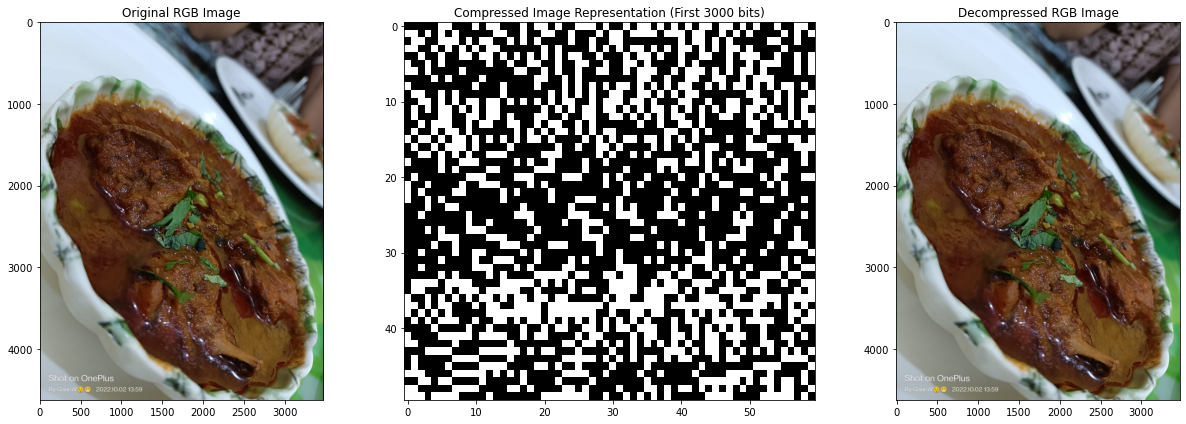

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

class HuffmanNode:
    def __init__(self, symbol=None, probability=None, left=None, right=None):
        self.symbol = symbol
        self.probability = probability
        self.left = left
        self.right = right

class HuffmanCoding:
    def __init__(self, image_path):
        self.image_path = image_path
        self.rgb_image = io.imread(image_path)
        self.flattened_images = {
            'R': self.rgb_image[:,:,0].flatten(),
            'G': self.rgb_image[:,:,1].flatten(),
            'B': self.rgb_image[:,:,2].flatten()
        }
        self.probabilities = {'R': None, 'G': None, 'B': None}
        self.huffman_trees = {'R': None, 'G': None, 'B': None}
        self.codes = {'R': {}, 'G': {}, 'B': {}}
        self.encoded_images = {'R': None, 'G': None, 'B': None}

    def calculate_probabilities(self, channel):
        counts, _ = np.histogram(self.flattened_images[channel], bins=256, range=(0, 256))
        total_pixels = len(self.flattened_images[channel])
        self.probabilities[channel] = counts / total_pixels

    def build_huffman_tree(self, channel):
        nodes = [HuffmanNode(symbol=i, probability=p) for i, p in enumerate(self.probabilities[channel])]
        nodes = sorted(nodes, key=lambda x: x.probability)
        
        while len(nodes) > 1:
            left = nodes.pop(0)
            right = nodes.pop(0)
            new_node = HuffmanNode(probability=left.probability + right.probability, left=left, right=right)
            nodes.append(new_node)
            nodes = sorted(nodes, key=lambda x: x.probability)
        
        self.huffman_trees[channel] = nodes[0]

    def generate_codes(self, channel, node=None, code=""):
        if node is None:
            node = self.huffman_trees[channel]
        if node.left is None and node.right is None:
            self.codes[channel][node.symbol] = code
            return
        self.generate_codes(channel, node.left, code + "0")
        self.generate_codes(channel, node.right, code + "1")

    def encode_image(self, channel):
        encoded_image = [self.codes[channel][pixel] for pixel in self.flattened_images[channel]]
        self.encoded_images[channel] = ''.join(encoded_image)

    def decode_image(self, channel):
        decoded_image = []
        current_code = ""
        code_to_symbol = {v: k for k, v in self.codes[channel].items()}
        
        for bit in self.encoded_images[channel]:
            current_code += bit
            if current_code in code_to_symbol:
                decoded_image.append(code_to_symbol[current_code])
                current_code = ""
        
        return np.reshape(decoded_image, self.rgb_image.shape[:2])

def main():
    image_path = input("Enter the path to the image file: ")
    huffman_coding = HuffmanCoding(image_path)
    
    for channel in ['R', 'G', 'B']:
        huffman_coding.calculate_probabilities(channel)
        huffman_coding.build_huffman_tree(channel)
        huffman_coding.generate_codes(channel)
        huffman_coding.encode_image(channel)

    # Decode Huffman encoded images for each channel
    decoded_images = {channel: huffman_coding.decode_image(channel) for channel in ['R', 'G', 'B']}
    
    # Combine decoded channels into one RGB image
    decoded_rgb_image = np.stack(
        (decoded_images['R'], decoded_images['G'], decoded_images['B']), axis=-1
    ).astype(np.uint8)

    # Display the original, compressed representation, and decompressed color images
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(huffman_coding.rgb_image)
    plt.title('Original RGB Image')
    
    # Display a compressed representation (First 1000 bits from each channel)
    compressed_image_r = huffman_coding.encoded_images['R'][:1000]
    compressed_image_g = huffman_coding.encoded_images['G'][:1000]
    compressed_image_b = huffman_coding.encoded_images['B'][:1000]
    compressed_image = np.array([int(bit) for bit in compressed_image_r + compressed_image_g + compressed_image_b])
    compressed_image_reshaped = np.reshape(compressed_image, (50, 60))
    plt.subplot(1, 3, 2)
    plt.imshow(compressed_image_reshaped, cmap='gray', aspect='auto')
    plt.title('Compressed Image Representation (First 3000 bits)')
    
    plt.subplot(1, 3, 3)
    plt.imshow(decoded_rgb_image)
    plt.title('Decompressed RGB Image')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
